In [1]:
!pip install -q scanpy

In [19]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [4]:
pwd

'/home/mehrshad/single_cell_RNA_seq_Mouse_brain'

In [5]:
adata = sc.read("input/brain_raw/brain_raw.h5ad")

In [6]:
adata.obs.head()

,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
cell,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923


In [14]:
adata.var.head()


,ERCC
0610005C13Rik,False
0610007C21Rik,False
0610007L01Rik,False
0610007N19Rik,False
0610007P08Rik,False


In [18]:
qc = sc.pp.calculate_qc_metrics(adata, qc_vars = ['ERCC'])

cell_qc_dataframe = qc[0]
gene_qc_dataframe = qc[1]

print('This is the cell quality control dataframe:')
cell_qc_dataframe.head()

This is the cell quality control dataframe:


,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_ERCC,log1p_total_counts_ERCC,pct_counts_ERCC
cell,,,,,,,,,,,
A1.B003290.3_38_F.1.1,3359,8.119696,390075.0,12.874097,25.884766,32.847017,42.219573,59.472666,10201.0,9.230339,2.615138
A1.B003728.3_56_F.1.1,1718,7.449498,776439.0,13.562474,43.051933,52.912721,65.313309,87.315423,67351.0,11.117688,8.674345
A1.MAA000560.3_10_M.1.1,3910,8.271548,1616087.0,14.295519,44.066006,51.514553,60.164211,74.451190,29870.0,10.304644,1.848292
A1.MAA000564.3_10_M.1.1,4352,8.378621,360004.0,12.793873,41.650926,48.958623,56.997422,69.736170,2592.0,7.860571,0.719992
A1.MAA000923.3_9_M.1.1,2248,7.718241,290282.0,12.578611,63.392494,69.136908,77.168753,90.522320,11002.0,9.305923,3.790107


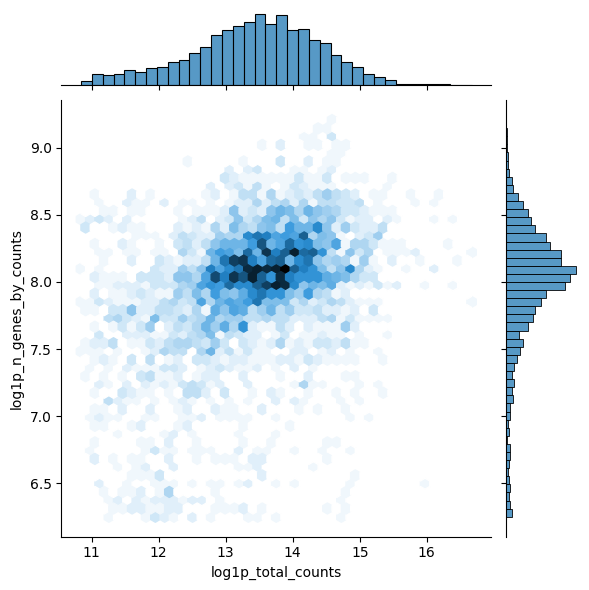

In [20]:
sns.jointplot(
    data=cell_qc_dataframe,
    x="log1p_total_counts",
    y="log1p_n_genes_by_counts",
    kind="hex"
)

<Axes: xlabel='pct_counts_ERCC', ylabel='Count'>

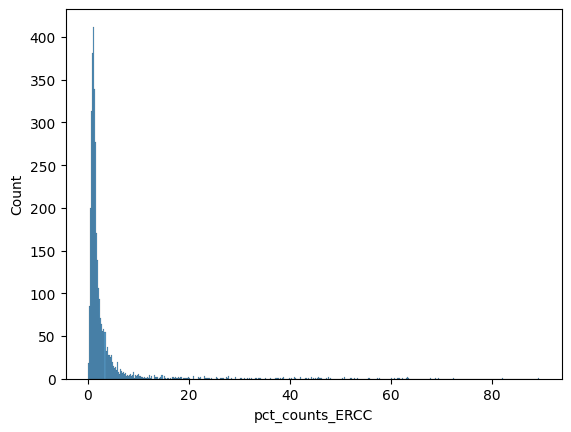

In [21]:
sns.histplot(cell_qc_dataframe["pct_counts_ERCC"])